In [1]:
import pandas as pd
snake_data = pd.read_csv("/disk2/ksebestyen/snake_mean_pool1.csv")
snake_data

,Unnamed: 0,term,year,embedding,count
0,0,snake,"(1659, 1660]","[0.42229244, 0.36857358, 0.35280636, -0.881568...",1.0
1,1,snake,"(1665, 1666]","[0.7280456, 0.44093573, 0.14600483, -0.0662165...",4.0
2,2,snake,"(1667, 1668]","[0.7246125, 0.9914261, -0.18277612, -0.0807323...",11.0
3,3,snake,"(1675, 1676]","[0.46854073, 0.6450831, -0.14852567, -0.207478...",20.0
4,4,snake,"(1677, 1678]","[0.83643913, 0.6176621, -0.17523482, -0.311356...",4.0
...,...,...,...,...,...
216,216,snake,"(1987, 1988]","[0.023736984, 0.5302895, -0.33462742, 0.063974...",2.0
217,217,snake,"(1988, 1989]","[-0.24469115, -0.045776665, -0.14848769, -0.18...",2.0
218,218,snake,"(1990, 1991]","[0.22737779, 0.6258589, -0.22171739, 0.4413356...",4.0
219,219,snake,"(1991, 1992]","[0.93037, 0.6985378, -0.359379, -0.35905826, 1...",4.0


In [2]:
snake_data["decade"] = snake_data.year.apply(lambda x: str(x)[1:4] + "0")
snake_data

,Unnamed: 0,term,year,embedding,count,decade
0,0,snake,"(1659, 1660]","[0.42229244, 0.36857358, 0.35280636, -0.881568...",1.0,1650
1,1,snake,"(1665, 1666]","[0.7280456, 0.44093573, 0.14600483, -0.0662165...",4.0,1660
2,2,snake,"(1667, 1668]","[0.7246125, 0.9914261, -0.18277612, -0.0807323...",11.0,1660
3,3,snake,"(1675, 1676]","[0.46854073, 0.6450831, -0.14852567, -0.207478...",20.0,1670
4,4,snake,"(1677, 1678]","[0.83643913, 0.6176621, -0.17523482, -0.311356...",4.0,1670
...,...,...,...,...,...,...
216,216,snake,"(1987, 1988]","[0.023736984, 0.5302895, -0.33462742, 0.063974...",2.0,1980
217,217,snake,"(1988, 1989]","[-0.24469115, -0.045776665, -0.14848769, -0.18...",2.0,1980
218,218,snake,"(1990, 1991]","[0.22737779, 0.6258589, -0.22171739, 0.4413356...",4.0,1990
219,219,snake,"(1991, 1992]","[0.93037, 0.6985378, -0.359379, -0.35905826, 1...",4.0,1990


In [3]:
snake_data["embedding"] = snake_data.embedding.apply(lambda x: eval(x))
#snake_data["embedding"]

import numpy as np

def np_mean(x):
    return np.mean(np.array(x.values.tolist()),axis=0).tolist()

snake_agg = snake_data.groupby("decade").agg({'embedding':np_mean, 'count':'sum'}).reset_index()
snake_agg

,decade,embedding,count
0,1650,"[0.42229244, 0.36857358, 0.35280636, -0.881568...",1.0
1,1660,"[0.7263290499999999, 0.716180915, -0.018385644...",15.0
2,1670,"[0.65248993, 0.6313726, -0.161880245, -0.25941...",24.0
3,1680,"[0.302554325, 0.37427971, -0.06657732, -0.1536...",32.0
4,1690,"[0.58699626, 0.8676234300000001, -0.29429476, ...",17.0
5,1700,"[0.32442078, 1.6347207, -0.0063994005, -0.2280...",2.0
6,1710,"[0.51925811, 0.66877058, -0.250303, 0.04115966...",17.0
7,1720,"[0.4917173, 0.46830964, -0.31098148, 0.0420885...",6.0
8,1730,"[0.33005497, 0.80053234, -0.4737539, -0.242740...",7.0
9,1740,"[0.151755912, 0.5321424379999999, -0.165556368...",10.0


In [4]:
docs_per_year = pd.read_csv("/disk2/ksebestyen/extCompDB.csv")
docs_per_year["decade"] = pd.read_csv("/disk2/ksebestyen/extCompDB.csv").Year.apply(lambda x: str(x)[0:3] + "0")

decade_count = docs_per_year.groupby("decade")["decade"].count()

snake_agg.join(pd.DataFrame(decade_count))

/disk2/ksebestyen/pythonEnvironment/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ValueError: columns overlap but no suffix specified: Index(['decade'], dtype='object')

In [5]:
snake_agg.reset_index()

,index,decade,embedding,count
0,0,1650,"[0.42229244, 0.36857358, 0.35280636, -0.881568...",1.0
1,1,1660,"[0.7263290499999999, 0.716180915, -0.018385644...",15.0
2,2,1670,"[0.65248993, 0.6313726, -0.161880245, -0.25941...",24.0
3,3,1680,"[0.302554325, 0.37427971, -0.06657732, -0.1536...",32.0
4,4,1690,"[0.58699626, 0.8676234300000001, -0.29429476, ...",17.0
5,5,1700,"[0.32442078, 1.6347207, -0.0063994005, -0.2280...",2.0
6,6,1710,"[0.51925811, 0.66877058, -0.250303, 0.04115966...",17.0
7,7,1720,"[0.4917173, 0.46830964, -0.31098148, 0.0420885...",6.0
8,8,1730,"[0.33005497, 0.80053234, -0.4737539, -0.242740...",7.0
9,9,1740,"[0.151755912, 0.5321424379999999, -0.165556368...",10.0


In [6]:
glob_emb = np.mean(np.array(snake_agg.embedding.values.tolist()),axis=0)

time_series = []

from sklearn.metrics.pairwise import cosine_similarity


for i in range(1,snake_agg.shape[0]):
    #time_series.append((snake_agg.iloc[i].decade,cosine_similarity([glob_emb],[np.mean(np.array(snake_agg[0:i+1].embedding.values.tolist()),axis=0)]).flatten()[0], snake_agg.iloc[i]['count']))
    time_series.append((snake_agg.iloc[i].decade,cosine_similarity([np.mean(np.array(snake_agg[(i-1):i].embedding.values.tolist()),axis=0)],[np.mean(np.array(snake_agg[i:i+1].embedding.values.tolist()),axis=0)]).flatten()[0], snake_agg.iloc[i]['count']))

result = pd.DataFrame(time_series, columns = ['Decade','Cos','Freq'])

In [7]:
result

,Decade,Cos,Freq
0,1660,0.332370,15.0
1,1670,0.789325,24.0
2,1680,0.847124,32.0
3,1690,0.793454,17.0
4,1700,0.623353,2.0
5,1710,0.576986,17.0
6,1720,0.737704,6.0
7,1730,0.582344,7.0
8,1740,0.718828,10.0
9,1750,0.683152,12.0


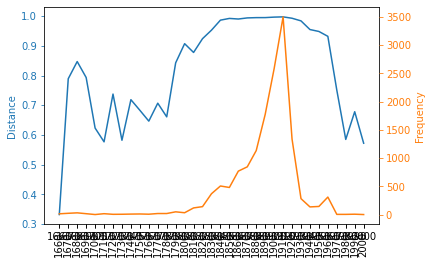

In [8]:
import matplotlib.pyplot as plt



fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(result.Decade, result.Cos, color="C0")
#ax.set_xlabel("Year", color="black")
ax.set_ylabel("Distance", color="C0")
#ax.tick_params(axis='x', colors="C0", )
ax.tick_params(axis='y', colors="C0")

ax2.plot(result.Decade, result.Freq, color="C1")
ax2.yaxis.tick_right()
#ax2.set_xlabel('Year', color="black") 
ax2.set_ylabel('Frequency', color="C1")       
#ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
#ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
plt.xticks(rotation=90)
plt.show()

#fig=plt.figure()
#plt.close("all")
#plt.figure()
#plt.plot(figsize=(10,6))
#plt.plot(result.Decade, result.Cos, label="snake")
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()